# Timeseries: In class exercise

We will be using a version of the "Residential power usage 3years data - Timeseries" dataset from Kaggle (see https://www.kaggle.com/datasets/srinuti/residential-power-usage-3years-data-timeseries).

This dataset includes two data files:

1. `power_usage_2016_to_2020.csv`: This includes the data on the number of kWh of energy used on each day from 2016 to 2020. The value column is measured in [kWh](https://en.wikipedia.org/wiki/Kilowatt-hour). The notes column can take values: `weekday`, `weekend`, `vacation`, `COVID_lockdown`.
2. `weather_2016_2020_daily.csv`: This includes various pieces of weather information for each relevant day

In [1]:
import pandas as pd

Load power usage data

In [2]:
power_usage = pd.read_csv("power_usage_2016_to_2020.csv")

# According to the documentation, datetimes are formatted
# incorrectly so they need to be reset
power_usage["dt"] = pd.date_range(
    "2016-06-01 00:00:00", freq="1H",
    periods=power_usage.shape[0]
)
power_usage = (
    power_usage.drop(
        columns=["day_of_week", "StartDate"]
    )
    .rename(
        columns={"Value (kWh)": "value"}
    )
)

In [3]:
power_usage.tail()

,value,notes,dt
35947,1.307,weekday,2020-07-07 19:00:00
35948,2.872,weekday,2020-07-07 20:00:00
35949,2.138,weekday,2020-07-07 21:00:00
35950,2.199,weekday,2020-07-07 22:00:00
35951,1.809,weekday,2020-07-07 23:00:00


Load weather data

In [4]:
weather = pd.read_csv("weather_2016_2020_daily.csv")

# According to the documentation, datetimes are formatted
# incorrectly so they need to be reset
weather["date"] = pd.date_range(
    "2016-06-01", freq="1D", periods=weather.shape[0]
)

weather = weather.drop(columns=["Date", "Day"])

In [5]:
weather.head()

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,date
0,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2,2016-06-01
1,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5,2016-06-02
2,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6,2016-06-03
3,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2,2016-06-04
4,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4,2016-06-05


In [6]:
power_usage = power_usage.set_index("dt")

In [7]:
import matplotlib.pyplot as plt

In [9]:
# fig, ax = plt.subplots()

weather_subset = weather.loc[:, ["date", "Temp_max"]]
power_subset = power_usage.drop(["notes"], axis=1).resample("d").sum()


<AxesSubplot:xlabel='dt'>

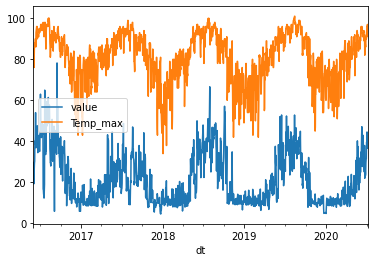

In [18]:
power_subset.join(weather_subset.set_index("date")).plot()

**Questions**

Feel free to explore the data on your own, but these are some hints for directions that we think could be interesting.

What week had the biggest difference between the largest and smallest hourly energy expenditure?

In [28]:
(
    power_usage
    .resample("W-Thu")
    ["value"]
    .agg(["min", "max"])
    .rename(columns={"min": "minn", "max": "maxx"})
    .eval("maxx - minn")
    .idxmax()
)

Timestamp('2016-07-07 00:00:00', freq='W-THU')

Plot daily energy usage vs daily temperature

What month had the highest total energy expenditure?

In [13]:
power_usage.drop(["notes"], axis=1).resample("m").sum().idxmax()

value   2016-08-31
dtype: datetime64[ns]

In [15]:
weather.query("date == '2016-08-31'")

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,date
91,93,84.5,78,76,73.6,70,88,71.0,54,15,5.9,0,29.8,29.8,29.7,0.0,2,2016-08-31


What month had the highest average energy expenditure over all of the years?

In [16]:
power_usage.drop(["notes"], axis=1).resample("m").mean().idxmax()

value   2016-08-31
dtype: datetime64[ns]

What months have the most rain where the data is collected?

In [23]:
weather.dtypes

Temp_max                int64
Temp_avg              float64
Temp_min                int64
Dew_max                 int64
Dew_avg               float64
Dew_min                 int64
Hum_max                 int64
Hum_avg               float64
Hum_min                 int64
Wind_max                int64
Wind_avg              float64
Wind_min                int64
Press_max             float64
Press_avg             float64
Press_min             float64
Precipit              float64
day_of_week             int64
date           datetime64[ns]
dtype: object

In [25]:
weather["moy"] = weather["date"].dt.month

In [30]:
weather.groupby("moy")["Precipit"].mean()

moy
1     0.139194
2     0.101416
3     0.092903
4     0.109500
5     0.133790
6     0.256333
7     0.113548
8     0.367013
9     0.220583
10    0.111774
11    0.058167
12    0.122581
Name: Precipit, dtype: float64

What months have the most wind?

Compute the rolling 24 hour average of energy expenditure.

How might you measure whether certain observations are an anomaly? According to your measure, are there anomalies? Do these anomalies correspond to something happening in the weather?

Compute the rolling 7 day average of energy expenditure.

How might you measure whether certain hourly observations are an anomaly? According to your measure, are there anomalies? Do these anomalies correspond to something happening in the weather?

In [41]:
power_df = power_usage.resample("d")["value"].sum()

<AxesSubplot:xlabel='dt'>

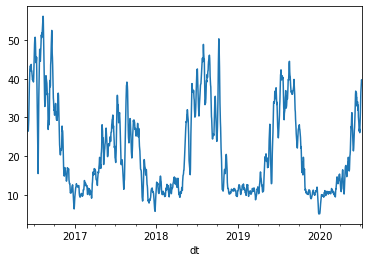

In [48]:
power_df.rolling(window="7d", min_periods=7).mean().plot()

<AxesSubplot:xlabel='dt'>

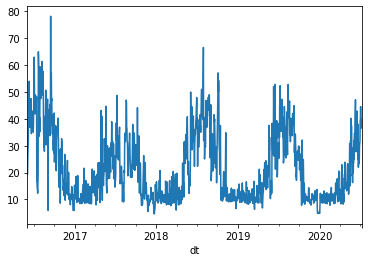

In [44]:
power_df.plot()

In [51]:
import numpy as np

In [55]:
foo = 100 * np.abs(power_df - power_df.rolling(window="7d", min_periods=7).mean()) / power_df.rolling(window="7d", min_periods=7).mean()

In [56]:
foo.describe()

count    1492.000000
mean       19.006162
std        17.347957
min         0.028335
25%         6.697390
50%        14.529506
75%        26.523168
max       190.476707
Name: value, dtype: float64

In [64]:
foo.loc["2016-07-15":"2016-07-24"]

dt
2016-07-15     60.044307
2016-07-16     56.104402
2016-07-17     56.572747
2016-07-18     51.497675
2016-07-19     48.870813
2016-07-20     19.588124
2016-07-21     23.463254
2016-07-22    190.476707
2016-07-23    115.968826
2016-07-24     62.064104
Freq: D, Name: value, dtype: float64

In [70]:
power_usage.resample("d").agg({"value": "sum", "notes": "first"}).loc["2016-07-15":"2016-07-22"]

,value,notes
dt,,
2016-07-15,16.696,vacation
2016-07-16,16.299,vacation
2016-07-17,14.246,vacation
2016-07-18,13.840,vacation
2016-07-19,12.329,vacation
2016-07-20,15.786,vacation
2016-07-21,19.101,vacation
2016-07-22,64.973,weekday


In [65]:
power_df.loc["2016-07-15":"2016-07-24"]

dt
2016-07-15    16.696
2016-07-16    16.299
2016-07-17    14.246
2016-07-18    13.840
2016-07-19    12.329
2016-07-20    15.786
2016-07-21    19.101
2016-07-22    64.973
2016-07-23    62.589
2016-07-24    56.825
Freq: D, Name: value, dtype: float64

In [63]:
weather.set_index("date").loc["2016-07-15":"2016-07-24"]

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,moy
date,,,,,,,,,,,,,,,,,,
2016-07-15,98,87.2,77,77,73.1,66,94,65.8,35,18,6.9,0,29.9,29.9,29.8,0.00,4,7
2016-07-16,96,86.0,77,77,72.3,66,94,66.3,38,16,5.6,0,29.9,29.9,29.8,0.00,5,7
2016-07-17,95,84.7,77,76,73.0,70,90,69.3,46,18,6.0,0,30.0,29.9,29.9,0.00,6,7
2016-07-18,96,84.1,77,77,75.0,72,94,75.0,49,9,3.5,0,30.0,30.0,30.0,0.00,0,7
2016-07-19,91,82.7,77,77,75.4,73,96,79.3,55,12,5.3,0,30.1,30.0,30.0,0.24,1,7
2016-07-20,97,85.6,76,77,74.0,71,97,70.8,43,12,3.9,0,30.1,30.0,30.0,0.22,2,7
2016-07-21,97,86.8,76,77,71.9,64,94,64.8,34,12,3.9,0,30.0,30.0,29.9,0.01,3,7
2016-07-22,98,87.5,77,76,72.6,67,94,64.0,37,12,3.4,0,30.0,29.9,29.8,0.00,4,7
2016-07-23,98,87.5,78,76,73.8,70,90,65.4,40,10,5.5,0,29.9,29.8,29.8,0.00,5,7
